In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier #决策树分类
import sklearn.datasets as datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor #决策树回归
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #制造数据
%matplotlib inline

In [2]:
center = [[-6,0], [5,0], [10,-2]] #三个圆心

In [4]:
x, y = make_blobs(n_samples=1000, #表示点的数量
                  centers=center, #表示三个中心
                  cluster_std=[1.0, 0.9, 1.7]) #这个表示标准差，描述离散程度

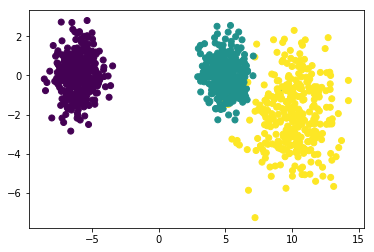

In [5]:
plt.scatter(x[:,0], x[:,1], c=y) #绘图
plt.show()

In [6]:
dtc = DecisionTreeClassifier(max_depth=100) #决策树，深度越深，精度越高
dtc.fit(x, y) #训练数据

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                      splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
h = 0.02 #步长
x_min, x_max = x[:, 0].min()-1, x[:,0].max()+1 #上限，下限
y_min, y_max = x[:, 1].min()-1, x[:,1].m11!ax()+1
xx, yy = np.meshgrid(np.arange(x_min, y_max, h),
                     np.arange(y_min, y_max, h)) #生成网格
z = dtc.predict(np.c_[xx.ravel(), yy.ravel()]) #得到预测
z = z.reshape(xx.shape) #结果降维
z

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

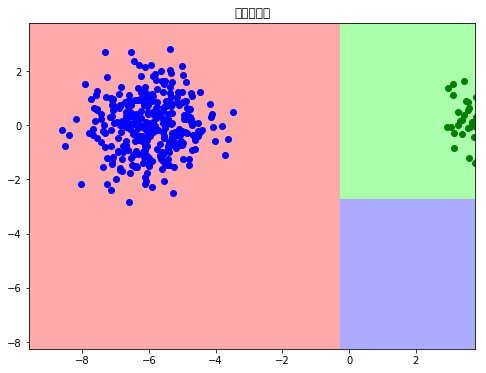

In [12]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8, 6)) #描述大小
cmaps = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) #绘图
plt.contourf(xx, yy, z, cmap=cmaps) #分类的颜色
plt.title("决策树回归")
plt.axis("tight")
colors = "bgy"
#遍历三个类，根据颜色，标识
for i,color in zip(dtc.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(x[idx,0], x[idx,1], c=color, cmap=plt.cm.Paired)
plt.show()